# Tutorial for *diskmap*

In this tutorial we will apply `diskmap` to a polarized scattered light image of the protoplanetary disk around LkCa 15. The data was obtained with [VLT/SPHERE](https://www.eso.org/sci/facilities/paranal/instruments/sphere.html) and published by [Thalmann et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...828L..17T/abstract).

## Getting started

We start by importing the required Python modules:

In [1]:
import diskmap
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from astropy.io import fits

## The scattered light image of LkCa 15

Next, we download the scattered light image of LkCa 15:

In [2]:
urllib.request.urlretrieve('https://people.phys.ethz.ch/~stolkert/lkca15_irdis_qphi.fits',
                           'lkca15_irdis_qphi.fits')

('lkca15_irdis_qphi.fits', <http.client.HTTPMessage at 0x1249fb198>)

The data is read with the `astropy` module:

In [3]:
image = fits.getdata('lkca15_irdis_qphi.fits')

We convert the NaNs from the masked region to zeros:

In [4]:
image = np.nan_to_num(image)

Let's have a look at the image:

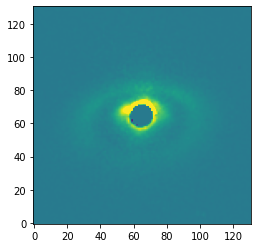

In [5]:
plt.imshow(image, origin='lower', vmin=np.amin(image), vmax=0.35*np.amax(image))

## Scattered light mapping of the disk surface

Now we create an instance of `DiskMap` by providing the FITS filename, the pixel scale of SPHERE/IRDIS (12.25 mas), the inclination (50 deg) and position angle (90 deg) of the disk, and the distance (160 pc).

In [6]:
mapping = diskmap.DiskMap(fitsfile='lkca15_irdis_qphi.fits',
                          pixscale=0.01225,
                          inclination=50.,
                          pos_angle=90.,
                          distance=160.)

The scattering surface is mapped with the `map_disk` method. Here, we provide a powerlaw funtion as estimate for the shape of the disk surface for which we test a constant opening angle: h(r) = 0.0 + 0.05r<sup>1.0</sup>. The `radius` parameter sets the sampling of radius (100 points between 1 and 500 au) for which it is important that the outer radius is larger than the field of view of the image.

In [7]:
mapping.map_disk(power_law=(0., 0.05, 1.),
                 radius=(1., 500., 100))

## Radius and scattering angle

Any available output from the `DiskMap` methods is written by calling `write_output`.

In [8]:
mapping.write_output(filename='lkca15')

The physical distance from the disk surface to the star at each pixel is stored in the `_radius.fits` file.

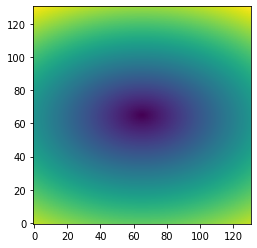

In [9]:
radius = fits.getdata('lkca15_radius.fits')
plt.imshow(radius, origin='lower')

Similarly, the scattering angle on the disk surface at each pixel position is stored in the `_scat_angle.fits` file.

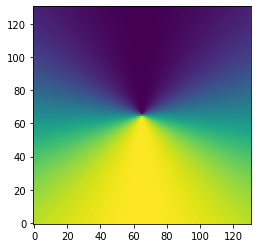

In [10]:
scat_angle = fits.getdata('lkca15_scat_angle.fits')
plt.imshow(scat_angle, origin='lower')

## Irradiation correction

In [11]:
mapping.r2_scaling(r_max=100.)

In [12]:
mapping.write_output(filename='lkca15')

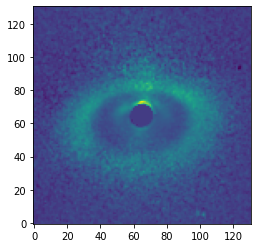

In [13]:
r2_scaled = fits.getdata('lkca15_r2_scaled.fits')
plt.imshow(r2_scaled, origin='lower')

## Disk deprojection

In [14]:
mapping.deproject_disk()

In [15]:
mapping.write_output(filename='lkca15')

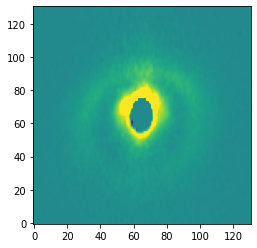

In [16]:
deprojected = fits.getdata('lkca15_deprojected.fits')
plt.imshow(deprojected, origin='lower', vmin=np.amin(deprojected), vmax=0.25*np.amax(deprojected))

## Estimate the total intensity image

In [17]:
mapping.total_intensity(pol_max=1.)

In [18]:
mapping.write_output(filename='lkca15')

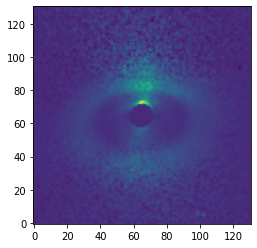

In [19]:
total_intensity = fits.getdata('lkca15_total_intensity.fits')
plt.imshow(total_intensity, origin='lower')

## Extract the scattering phase function

In [20]:
mapping.phase_function(radius=(80., 100.), n_phase=30)

In [21]:
mapping.write_output(filename='lkca15')

In [22]:
angle, pol_flux, pol_error, total_flux, total_error = np.loadtxt('lkca15_phase_function.dat', unpack=True)

<ErrorbarContainer object of 3 artists>

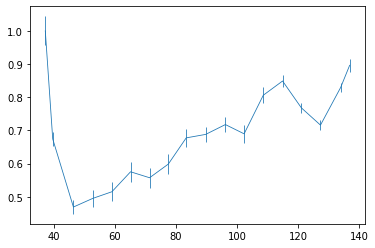

In [23]:
plt.errorbar(angle, pol_flux, yerr=pol_error)

<ErrorbarContainer object of 3 artists>

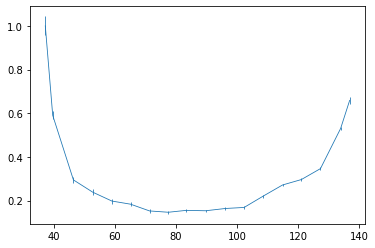

In [24]:
plt.errorbar(angle, total_flux, yerr=total_error)